# Store Item Demand Forecasting Challenge

This project attempts to predict thre months of sales per item per store. The challenge, description and data are available on [Kaggle](https://www.kaggle.com/c/demand-forecasting-kernels-only/overview). The dataset provides five years worth of daily sales data for 50 different items at 10 different stores. The test and train data both contain 4 columns but when merged, the id column from the test data and the sales column from the train data increase the number to five, including date, store, item, sales, and id.

As with any analysis in R, the first task is to load the libraries and data. Libraries expected to be use din this analysis include tidyverse, lubridate, stringr and forecast.


In [27]:
library(tidyverse)
#library(funModeling)
library(ggplot2)

# Read files on Kaggle, store to object and view sample
train <- read_csv("../input/demand-forecasting-kernels-only/train.csv")
test <- read_csv("../input/demand-forecasting-kernels-only/test.csv")
storedata <- bind_rows(train, test)

head(storedata)
tail(storedata)

## Exploratory Data Analysis
Although this is a time series forecasting problem, it is wise to view the characteristics and relationships within the data. 

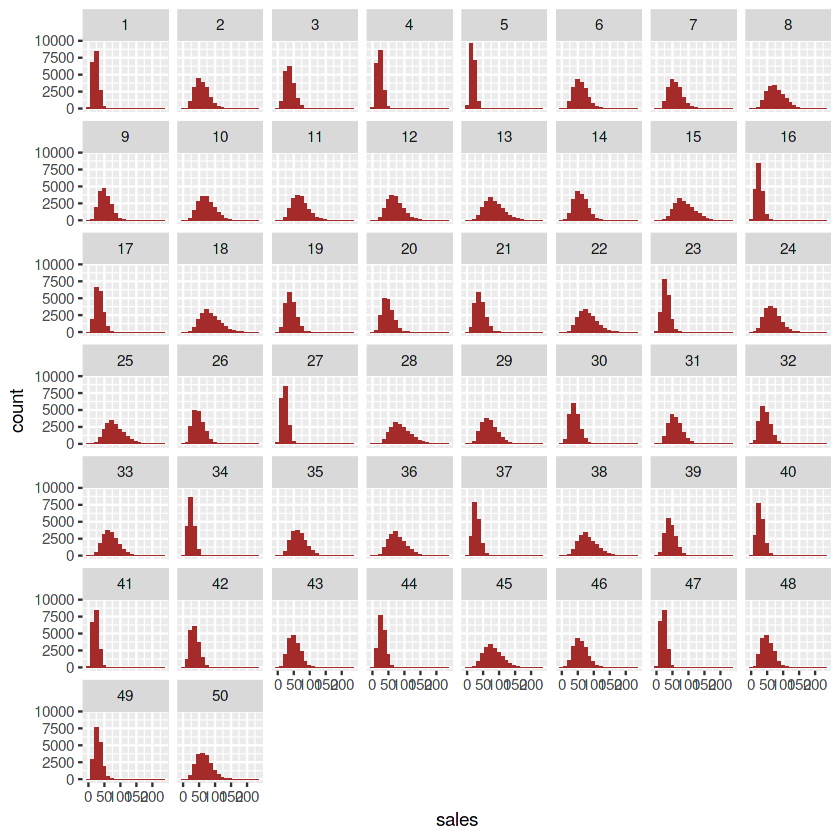

In [31]:
summary(train)
glimpse(train)
hist(train$sales)

glimpse(test)

# View sales distribution by store
ggplot(train, aes(x = sales)) + geom_histogram(fill = 'violetred4', bins = 20) + facet_wrap(~store, ncol = 5) + 
    labs(x = "sales", main = 'Sales Distribution by Store')

# View sales distribution by item
ggplot(train, aes(x = sales)) + geom_histogram(fill = 'violetred4', bins = 20) + facet_wrap(~item, ncol = 5) + 
    labs(x = "sales", main = 'Sales Distribution by Item')

The histogram shows total sales are skewed to the left and the majority of sales are between 20 and 70. The sales distribution by item, as may be expected, shows some items are sold in singles or small quantities. A simple example of this would be sales of PCs, users would usually buy only a few of these kind of items. The sales distribution of other items are a lot more evenly distributed; however, they all show a skew to the left.

## Trends in the Data

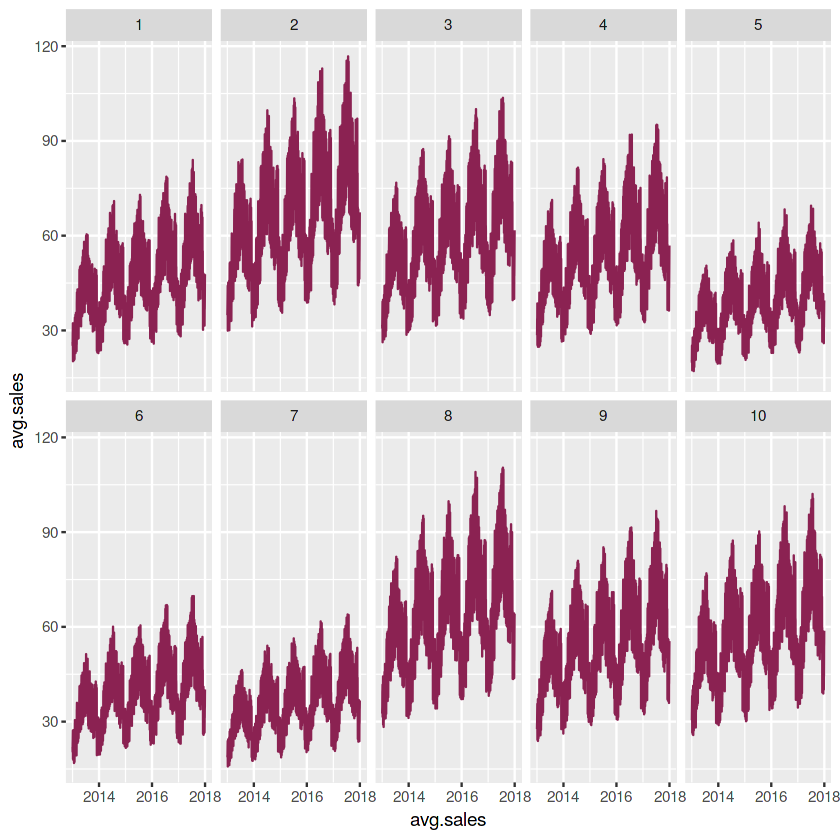

In [37]:
# Summarize data by store
mean_sales <- train %>% group_by(date, store) %>% summarise(avg.sales = mean(sales))
head(mean_sales)

ggplot(mean_sales, aes(x = date, y = avg.sales)) + geom_line(color = 'violetred4') + facet_wrap(~store, ncol = 5) + 
    labs(x = "avg.sales", main = 'Sales Trend by Store')

The trends charts shows a cyclic nature to sales in each store, all following about the same pattern although some stores have highers sales on average. There seems to be a spike in the data at the same point in each store per year. The spike looks to happen before the end of the year, around october or November.